# Biophysics Lab - 4/12/2019 (single-molecule folding)

## Author: Stephanie M. Yan

Folding simulation for 1000 s.

In [3]:
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import numpy.random as rnd

matplotlib.rcParams.update({"axes.formatter.limits": (-3,3)})
plotStyles={"markersize":10,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}

## 1. Create a list of waiting times (the time between transitions) in both the folded and unfolded state. Use the np.histogram function to calculate a histogram of the waiting times for both states, using 20 bins. Plot the two histograms as bar plots.

All the code in the box directly below was written by James Rives. Essentially it simulates smFRET data for 1000 molecules and appends information to `ts` and `states`.

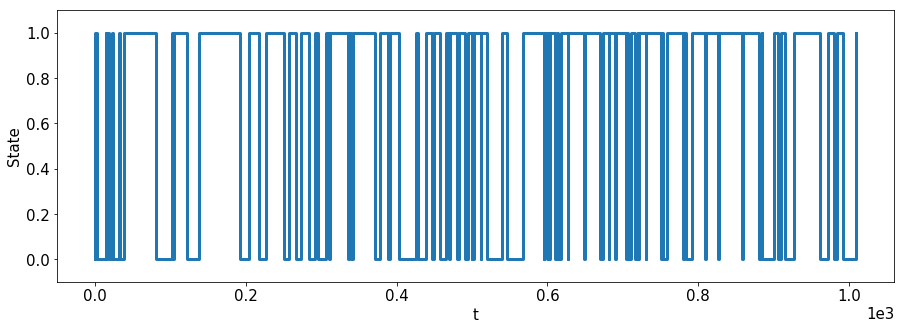

In [10]:
k1=0.15
k2=0.07

ts=[0.0]   # a list of the times when a state change has occurred
states=[0] # state 0 is unfolded, state 1 is folded
tf=1000.0   # the final time of the simulation

while (ts[-1]<tf):
    # If we are in the unfolded state, figure out when the molecule transitions to the folded state.
    if states[-1] == 0:
        ts.append(ts[-1]+rnd.exponential(1/k1))
        states.append(1)
        
    # If we are in the folded state, figure out when the molecule transitions to the unfolded state.
    else:
        ts.append(ts[-1]+rnd.exponential(1/k2))
        states.append(0)

matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,5)})
step(ts,states, **stepStyles)
xlabel('t'); ylim([-0.1,1.1]); ylabel('State');

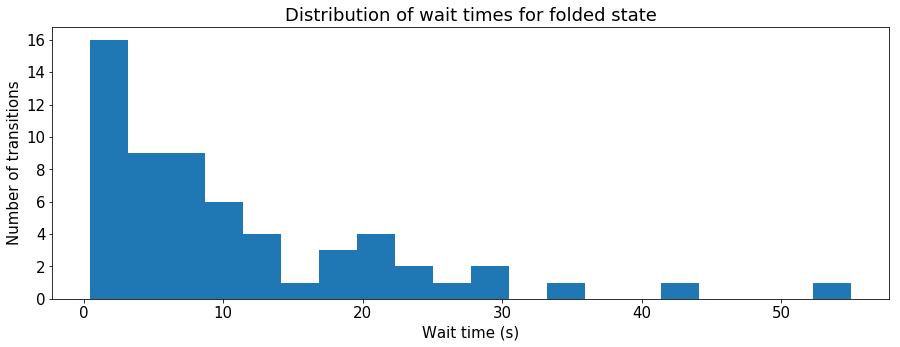

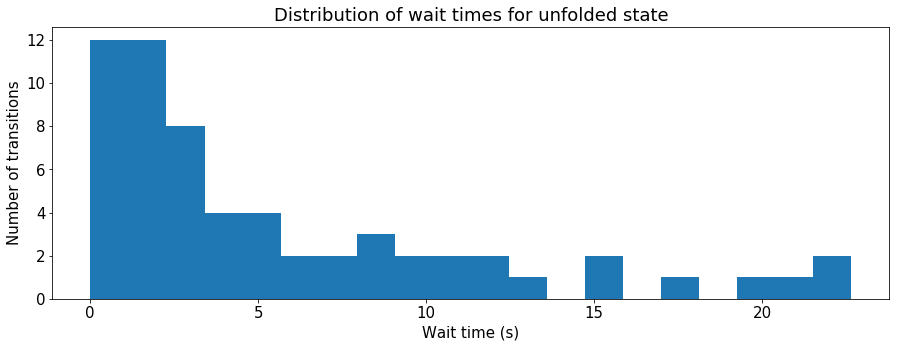

In [12]:
# lists of wait times in folded and unfolded states
wfold = []
wunfold = []

# ts is list of the times when a state change occurs
# I'm assuming that at time 0, we start off in an unfolded state
for i in range(0,len(ts)):
    if i == 0:
        continue
    elif (i % 2) == 0: # if the index # of the wait time is divisible by 2 (it's even)
                        # then the molecule has just transitioned from unfolded to folded
        wait = ts[i] - ts[i-1] # wait time = difference between current time and the time of the last transition
                                # i.e. the time the molecule spent in the unfolded state before folding
        wfold.append(wait)
    else: # if the index # of the wait time is odd, the molecule has just transitioned from folded to unfolded
        wait = ts[i] - ts[i-1]
        wunfold.append(wait)

# plot histogram of wait times for folded and unfolded states
def plotwaits(listid, stateid):
    fig, ax = plt.subplots()
    ax.hist(listid,bins=20)
    ax.set_xlabel("Wait time (s)")
    ax.set_ylabel("Number of transitions")
    ax.set_title("Distribution of wait times for " + stateid + (" state"))

plotwaits(wfold, "folded")
plotwaits(wunfold, "unfolded")

## 2. Convert the counts into a probability density function (PDF). To do so, divide the histogram counts by the sum of all the counts and also by the width of the bin. Plot the calculated PDFs for the folding and unfolding transition times as a bar plot. On top of the bar plots, plot the PDF for an exponential distribution: p(t)=k*e^{-k*t}, where k is K1 or K2 as appropriate.

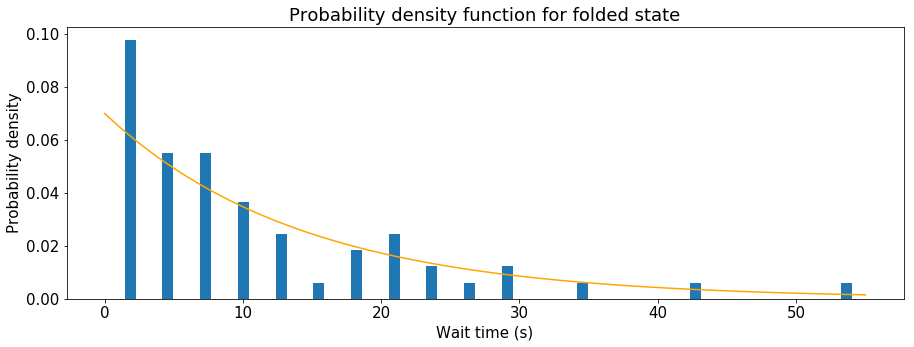

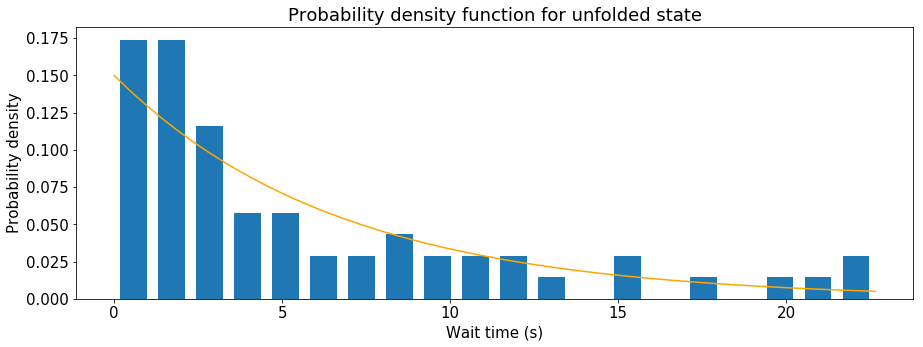

In [14]:
def plotpdfs(listid, kval, stateid):
    
    # use np.histogram to get list of histogram bin counts and edges
    hist, edges = np.histogram(listid, bins=20)
    
    # create list of x-coordinates for the centers of the bars
    xcoords = []
    for i in range(0,len(edges)):
        if i == 0:
            continue
        else:
            coord = (edges[i] + edges[i-1])/2 # center of each histogram bar is the average of its edge coordinates
            xcoords.append(coord)

    width = edges[1] - edges[0] # get width of each histogram bin
    sum_counts = sum(hist) # get sum of all counts

    xvals = np.linspace(0,edges[-1]) # get linearly spaced values to plot PDF for exponential distribution
    yvals = kval*(exp(-kval*xvals)) # compute the y values for exponential distribution
    
    # get pdf value for each bar in the histogram
    pdfs = [(count/sum_counts)/width for count in hist]
    # plot histogram and exponential distribution
    fig, ax2 = plt.subplots()
    ax2.bar(xcoords,pdfs,width=0.8)
    ax2.plot(xvals,yvals,color="orange")
    ax2.set_xlabel("Wait time (s)")
    ax2.set_ylabel("Probability density")
    ax2.set_title("Probability density function for " + stateid + (" state"))

plotpdfs(wfold, k2, "folded")
plotpdfs(wunfold, k1, "unfolded")

## 3. Write a python script to fit your calculated PDFs to exponential distributions to estimate K1 and K2. Plot the calculated PDFs as bar plots overlaid with the best fit estimates. What is the relative error in your estimated K1 and K2 vs the actual K1 and K2?

In [15]:
from scipy.optimize import curve_fit

# define function for fitting
def expdistrib(x, k):
    return (k*(exp(-k*x)))

def fitpdfs(listid):
    
    # use np.histogram to get list of histogram bin counts and edges
    hist, edges = np.histogram(listid, bins=50)
    
    width = edges[1] - edges[0] # get width of each histogram bin
    sum_counts = sum(hist) # get sum of all counts
    
    # get pdf value for each bar in the histogram
    pdfs = [(count/sum_counts)/width for count in hist]
    # get linearly spaced x values to pass to optimize function
    xvals = np.linspace(0,edges[-1])
    
    # Initial guess
    p0 = [0.15]

    # Fit data
    popt, pcov = curve_fit(expdistrib, xvals, pdfs, p0)
    return(popt, pcov)

# calculate best fit k for folded and unfolded wait time distributions
fopt, fcov = fitpdfs(wfold)
print("k2 = " + str(fopt))
print("k2 error = " + str(fcov))

uopt, ucov = fitpdfs(wunfold)
print("k1 = " + str(uopt))
print("k1 error = " + str(ucov))

k2 = [0.10092458]
k2 error = [[0.00020309]]
k1 = [0.19872892]
k1 error = [[0.00025617]]
